In [1]:
import matplotlib.pyplot as plt
import awkward as aw
import numpy as np
import uproot
import hist

In [2]:
data = uproot.open("./RnColumnPMT_4-4_PTFE_1e6.root:events/events")

In [152]:
#aw.num(data["photodethitID"].array(), axis=1)

#data.keys()

In [161]:
hGen = hist.Hist(hist.axis.Regular(200, -200, 200, name="xp_pri", underflow=False, overflow=False),
                 hist.axis.Regular(200, -200, 200, name="yp_pri", underflow=False, overflow=False),
                 hist.axis.Regular(100, -200, -300, name="zp_pri", underflow=False, overflow=False),
                 storage=hist.storage.Int64())

hGen.fill(
    aw.ravel(data["xp_pri"].array()),
    aw.ravel(data["yp_pri"].array()),
    aw.ravel(data["zp_pri"].array()),
)

hDet = hist.Hist(*hGen.axes,
                 hist.axis.Regular(9, -1, 8, name="PmtID", underflow=False, overflow=False),
                 storage=hist.storage.Weight())

nhits = aw.num(data["photodethitID"].array(), axis=1)
# or: aw.ravel(data["nphotodethits"].array()

hDet.fill(
    aw.ravel(data["xp_pri"].array()),
    aw.ravel(data["yp_pri"].array()),
    aw.ravel(data["zp_pri"].array()),
    aw.fill_none(aw.mask(data["photodethitID"].array(), nhits>0)[:, 0], -1),
    weight=aw.ravel(data["nphotodethits"].array()),
)

Hist(
  Regular(200, -200, 200, underflow=False, overflow=False, name='xp_pri'),
  Regular(200, -200, 200, underflow=False, overflow=False, name='yp_pri'),
  Regular(100, -200, -300, underflow=False, overflow=False, name='zp_pri'),
  Regular(9, -1, 8, underflow=False, overflow=False, name='PmtID'),
  storage=Weight()) # Sum: WeightedSum(value=10091, variance=10091)

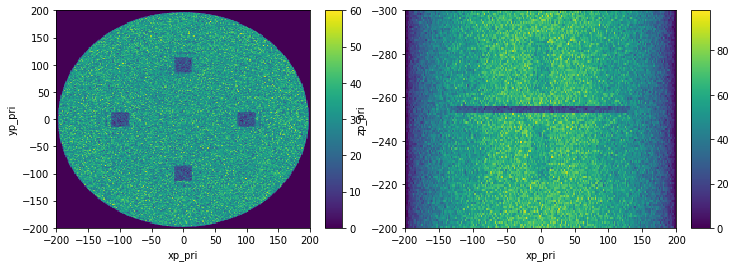

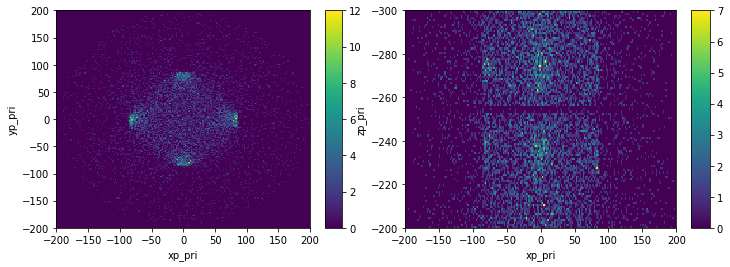

In [162]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
hGen[:,:, sum].plot2d(ax=axs[0])
hGen[:, sum, :].plot2d(ax=axs[1])
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
hDet[:,:, sum, sum].plot2d(ax=axs[0])
hDet[:, sum, :, sum].plot2d(ax=axs[1])
plt.show()

In [166]:
hLCE_xz = hist.Hist(hGen.axes[0], hGen.axes[2], hDet.axes[3],
                    storage=hist.storage.Double())

hLCE_xz[...] = np.divide(hDet[:, sum, :, :].values(), hGen[:, sum, :].values()[:,:,None], 
                         where=hDet[:, sum, :, :].values()!=0)

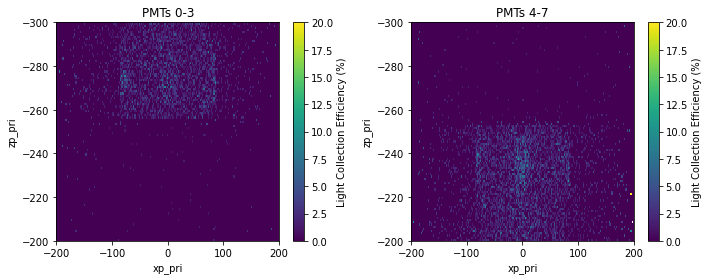

In [183]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title("PMTs 0-3")
(hLCE_xz[:,:,4j:8j][:,:,sum]*100.).plot2d(ax=axs[0], cmax=20, cbar=False)
cbar = plt.colorbar(axs[0].collections[0], ax=axs[0])
cbar.set_label('Light Collection Efficiency (%)')

axs[1].set_title("PMTs 4-7")
(hLCE_xz[:,:,0j:4j][:,:,sum]*100.).plot2d(ax=axs[1], cmax=20, cbar=False)
cbar = plt.colorbar(axs[1].collections[0], ax=axs[1])
cbar.set_label('Light Collection Efficiency (%)')

plt.tight_layout()
plt.show()

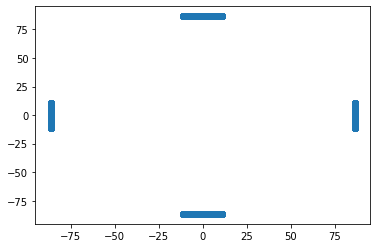

In [10]:
plt.scatter(aw.ravel(data["photodethitXp"].array()), aw.ravel(data["photodethitYp"].array()))

In [6]:
data = uproot.open("./test_RefSetup.root:events/events")

In [ ]:
plt.scatter(data["xp_pri"], data["yp_pri"])
plt.scatter(aw.ravel(data["photodethitXp"].array()), aw.ravel(data["photodethitYp"].array()))

In [3]:
Xp_pri = aw.ravel(data["xp_pri"].array())
Yp_pri = aw.ravel(data["yp_pri"].array())
Zp_pri = aw.ravel(data["zp_pri"].array())

In [4]:
Collimator = multihist.Histdd(Yp_pri, Zp_pri, 
                              dimensions=[('Yp', np.linspace(-5, 5, 100)), 
                                          ('Zp', np.linspace(18, 25, 100))])

(<matplotlib.collections.QuadMesh at 0x246ae077dc0>,
 <matplotlib.colorbar.Colorbar at 0x246ae12c5e0>)

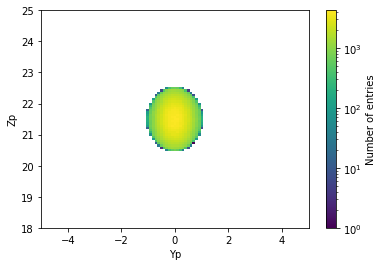

In [9]:
Collimator.plot(log_scale=True, log_scale_vmin=1)

In [11]:
detXp = aw.ravel(data["photodethitXp"].array())
detYp = aw.ravel(data["photodethitYp"].array())
detZp = aw.ravel(data["photodethitZp"].array())
angle = np.rad2deg(np.arctan2(detYp, detXp))+180

In [10]:
PMT_screen = multihist.Histdd(angle, detZp, 
                              dimensions=[('angle', np.linspace(55, 70, 100)), 
                                          ('Zp', np.linspace(18, 25, 100))])

(<matplotlib.collections.QuadMesh at 0x2468f6aea70>,
 <matplotlib.colorbar.Colorbar at 0x246ae530160>)

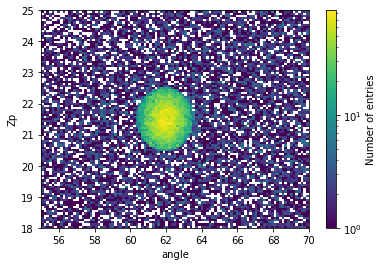

In [11]:
PMT_screen.plot(log_scale=True, log_scale_vmin=1)